# Web Scraping Analyze

## What is Web Scraping?
Web Scraping is the process where data id colected automatically from websites. It is like a copy paste action from a webpage, but instead of collecting manually the desired data, a program does it for you, already in the needed format. This program visits the website, looks at the code that is behind the page (you can do it with `Ctrl + Shift + i`) and picks the needed information (like text, images, or links) and saves it for later using.

## Why Web Scraping?
- **Efficient Data Gathering**: Web scrapers can collect and process large amounts of data quickly, unlike browsing websites manually.
- **Beyond Search Engines**: They can access specific data from multiple websites, even where search engines like Google can't reach.
- **API Alternative**: Web scraping is useful when APIs don't exist, are limited, or don't provide the exact data needed.
- **Versatile Applications**: Scraped data can be used for market analysis, trend tracking, and creative projects, providing nearly unlimited data access.
- **Business and Innovation**: Web scraping can guide business decisions, boost productivity, and open new creative avenues.

## Methods of Web Scraping

1. **Manual Copy-Pasting**

- **Description:** The simplest form of web scraping. Data is manually copied from a website and pasted into a file or spreadsheet.
- **Use Case:** Suitable for very small datasets or when automation isn't worth the effort.

2. **HTTP Requests (Using Libraries like requests)**

- **Description:** This method involves sending HTTP requests to a website's server to get the raw HTML content of a webpage.
- **Tools:** Python's requests library.
- **Use Case:** Ideal for scraping static websites where the content is directly available in the HTML. In this case you receive all the HTML content. With next methods you can actually parse the content and extract even the hidden information that you need.

3. **Parsing HTML (Using Libraries like BeautifulSoup or lxml)**

- **Description:** After retrieving the HTML, this method involves parsing the HTML content to extract specific data points.
- **Tools:** Python's BeautifulSoup or lxml libraries.
- **Use Case:** Suitable for extracting structured data like tables, lists, or specific elements (e.g., text within certain tags).

4. **Browser Automation (Using Tools like Selenium or Playwright)**

- **Description:** This method involves automating a web browser to interact with dynamic websites that use JavaScript to load content.
- **Tools:** Selenium, Playwright.
- **Use Case:** Best for scraping websites that require interaction (e.g., clicking buttons, filling forms) or where data is loaded dynamically.

5. **Headless Browsers (Using Tools like Puppeteer)**

- **Description:** Similar to browser automation, but using a headless browser that runs without a graphical user interface, making it faster and more resource-efficient.
- **Tools:** Puppeteer.
- **Use Case:** Ideal for scraping dynamic websites while reducing overhead from a full browser UI.

6. **API Scraping**

- **Description:** If a website provides an API, you can send requests directly to the API to retrieve structured data in a format like JSON or XML.
- **Tools:** Python's requests library or specific API clients.
- **Use Case:** Preferable when an API is available, as it is often more reliable and faster than scraping HTML.

7. **Scraping with Headless CMS Crawlers**

- **Description:** Some tools are designed to scrape content from headless CMS platforms that serve content via APIs.
- **Tools:** Custom-built crawlers or specialized tools.
- **Use Case:** Useful for scraping content-rich websites built on modern content management systems.

8. **Web Scraping Frameworks (Using Tools like Scrapy)**

- **Description:** Frameworks like Scrapy provide a comprehensive environment for building and managing web scraping projects, including scheduling, data storage, and more.
- **Tools:** Scrapy.
- **Use Case:** Best for large-scale scraping projects where you need to manage multiple spiders, handle complex data extraction, and store data efficiently.

9. **Data Extraction Services**

- **Description:** Third-party services or tools that provide web scraping as a service, where you specify the data you need, and they handle the scraping.
- **Tools:** Import.io, Octoparse.
- **Use Case:** Suitable for users who want to avoid the technical aspects of web scraping and focus solely on the data.

10. **Custom Scrapers**

- **Description:** Writing custom scripts for specific websites, using a combination of HTTP requests, HTML parsing, and automation as needed.
- **Tools:** Python, Node.js, etc.
- **Use Case:** Useful when dealing with unique websites that require specific handling or when pre-built tools don't offer the needed flexibility.

## Instructions How to Inspect a Web Page

Before starting the web scraping process you must understand what you want to exctract from the site and in which tags or attributes the needed information is available. this is the reason why we need to start our web scraping with a little reasearch process that is described below.

1. Open the desired web page for scraping
2. `Click Ctrl + Shift + i` to open DevTools
3. To inspect each element of the page click `Ctrl + Shift + C` or the icon from image below
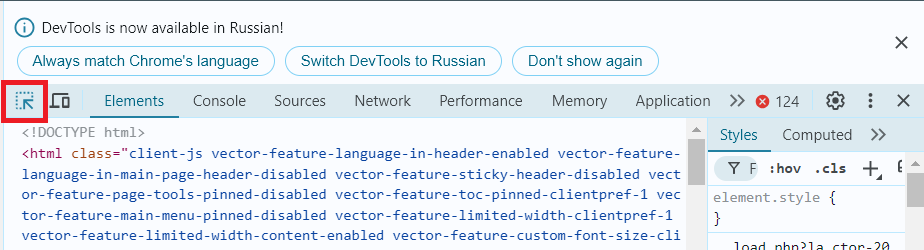
4. Put the cursor on the desired element and it will be highlighted and shown in the Elements Window
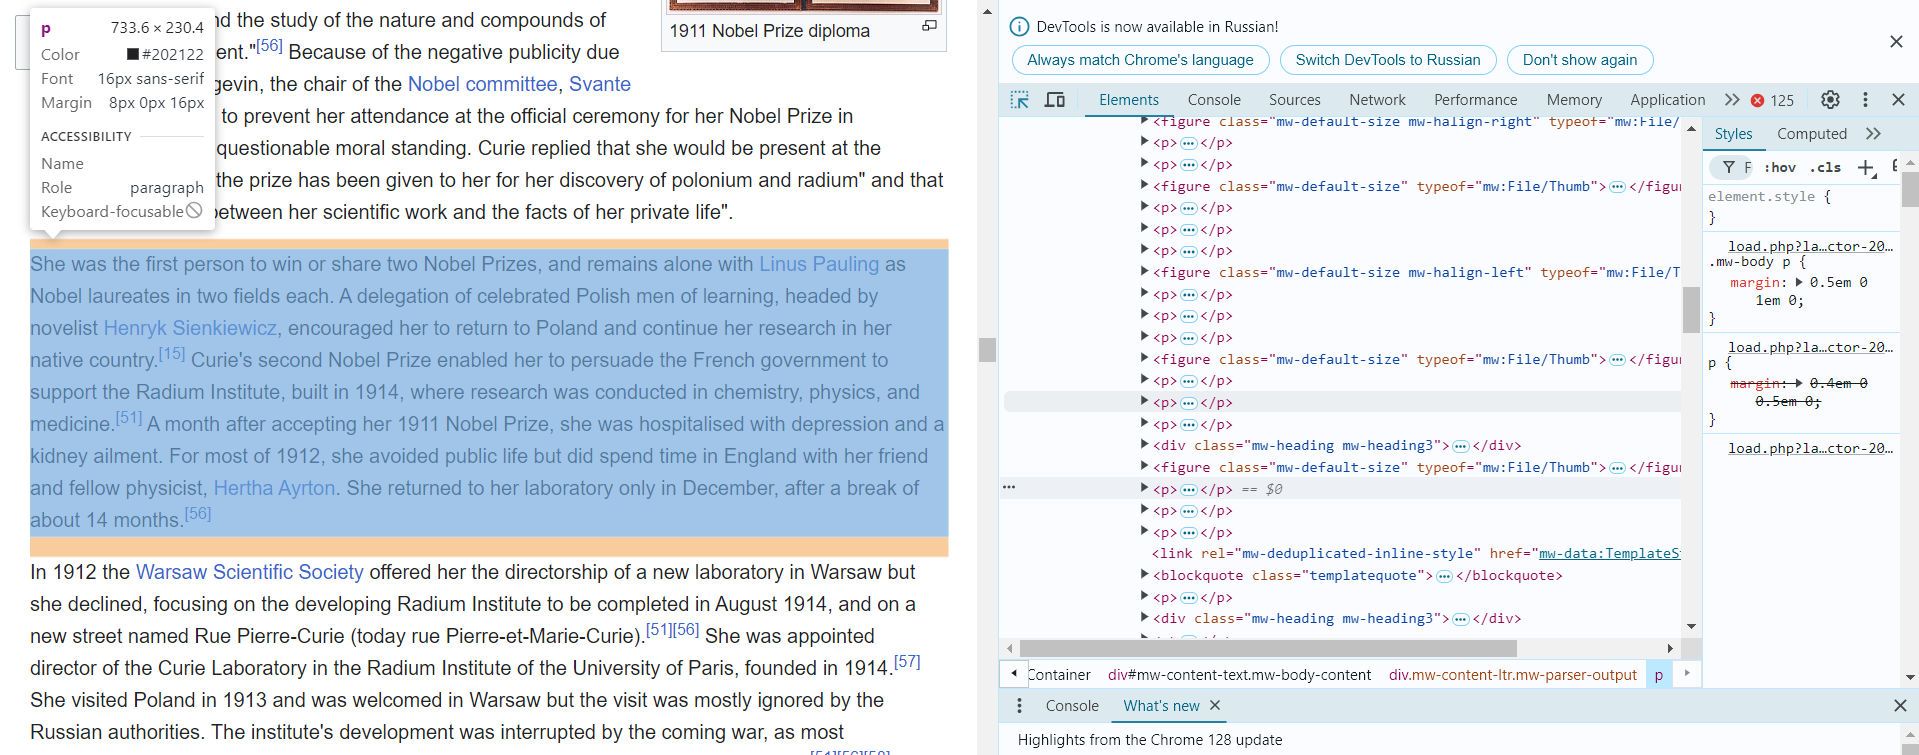

This is a simple example of how to inspect a Web Page

## Beautiful Soup
Beautiful Soup is a Python library for web scraping. It allows you to parse HTML and XML documents to extract the needed data. This librabry works by creating a parse tree from the page's source code, making it easier to navigate and search the specific elements, tags or attributes. You can use it to extract and manipulate data from websites in a structured way.

The parse tree of Beautiful Soup usually look like this:

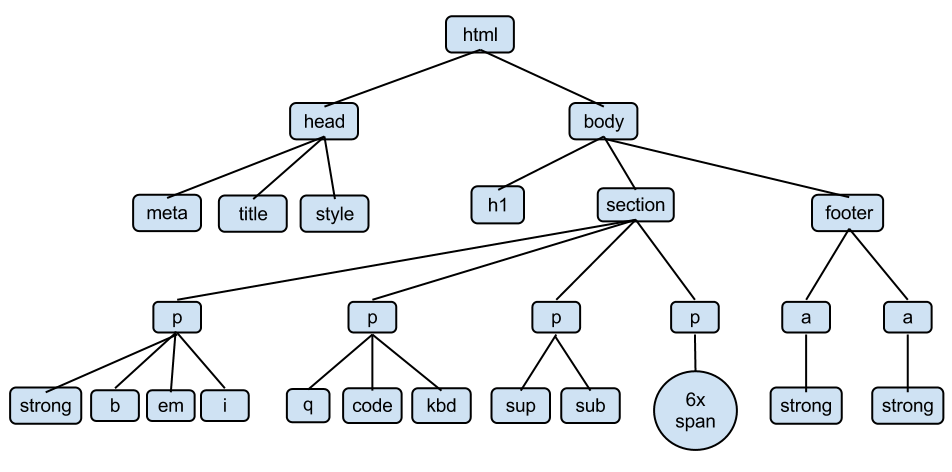

## LXML
lxml is a powerful Python library for processing XML and HTML documents. It combines the ease of use of Beautiful Soup with the speed and robustness of the native C libraries, libxml2 and libxslt. Lxml follows the ElementTree concept. To put it shortly: it treats the HTML and XML documents as a tree of node objects. In this tree, each element is represented as a node, where each node contains attributes, text values and child elements.

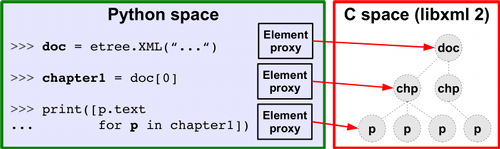

## Scrapy
Scrapy is an open-source web crawling framework for Python that allows you to extract data from websites efficiently. It works by defining a spider, which is a class that specifies how to scrape a particular site, including the URLs to visit and the data to extract.

<img src="https://docs.scrapy.org/en/latest/_images/scrapy_architecture_02.png" alt="Scrapy" width="600" height="400">

## Selenium
Selenium is a popular open-source tool used for automating web browsers. In the context of web scraping, it allows you to interact with web pages just like a human user would, making it particularly useful for scraping dynamic content that relies on JavaScript to load data. In this example, I worked only with static data to allow me to compare the performance of all scraping methods in same conditions.

In the next piece of code we import the needed libraries and modules for web scraping and data extraction, providing tools for making HTTP requests, parsing HTML, automating browser interactions, tracking memory usage, and visualizing data. If you don't have any of this libraries you must download it. Example of how it is done: `%pip install selenium`

In [1]:
import time
import requests
from bs4 import BeautifulSoup
from lxml import html
import scrapy
from scrapy.crawler import CrawlerProcess
from selenium import webdriver
from selenium.webdriver.common.by import By
import tracemalloc
import matplotlib.pyplot as plt

Next, we have the code that defines a performance measurement decorator function, `measure_performance`, that wraps another function to measure its execution time and memory usage, utilizing the `tracemalloc` module to track memory allocations and returning the function's result along with the execution time and peak memory usage in megabytes.

In [2]:
def measure_performance(func):
    def wrapper(*args, **kwargs):
        tracemalloc.start() # Starting tracking memory allocations
        start_time = time.time() # Recording the start time
        result = func(*args, **kwargs) # Calling the original function
        end_time = time.time() # Recording the end time
        current, peak = tracemalloc.get_traced_memory() ## Getting current and peak memory usage
        tracemalloc.stop() # Stoping tracking memory allocations
        execution_time = end_time - start_time # Recording the execution time
        memory_usage = peak / 10**6  # Converting bytes to MB
        return result, execution_time, memory_usage # Return the result, execution time, and memory usage
    return wrapper

This code defines four web scraping functions that extract paragraphs from Marie Curie's Wikipedia page using different libraries, each wrapped with a performance measurement decorator.

In [3]:
@measure_performance # Decorator to measure performance (time and memory usage)
def scrape_with_bs4():
    url = 'https://en.wikipedia.org/wiki/Marie_Curie' # The URL to scrape from the Wikipedia page
    response = requests.get(url) # Sending GET request to the URL (read more about HTTP request from: https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)
    soup = BeautifulSoup(response.content, 'html.parser') # Parsing the HTML content using BeautifulSoup
    paragraphs = [p.get_text() for p in soup.find_all('p')] # Extracting text from all paragraph tags
    return paragraphs

@measure_performance
def scrape_with_lxml():
    url = 'https://en.wikipedia.org/wiki/Marie_Curie'
    response = requests.get(url)
    tree = html.fromstring(response.content) # Also, parsing the HTML content but using lxml
    paragraphs = tree.xpath('//p/text()') # The syntax to extract text from all paragraph tags
    return paragraphs

@measure_performance
def scrape_with_scrapy():
    class ExampleSpider(scrapy.Spider): # Defining a Scrapy spider
        name = 'example_spider' # Naming the spider
        start_urls = ['https://en.wikipedia.org/wiki/Marie_Curie'] # Try to guess what it is from the 2 url above :)

        def parse(self, response):  # Parsing method for the spider
            paragraphs = response.xpath('//p/text()').getall() # Only noe, we start to extract the text from all paragraph tags using XPath
            return paragraphs

    process = CrawlerProcess() # Creating a Scrapy process
    result = process.crawl(ExampleSpider) # Starting crawling with the defined spider
    process.start() # Starting the Scrapy process
    return result

@measure_performance
def scrape_with_selenium():
    driver = webdriver.Chrome() # Initializing a Chrome WebDriver instance
    driver.get("https://en.wikipedia.org/wiki/Marie_Curie") # Navigating to the URL
    paragraphs = [p.text for p in driver.find_elements(By.TAG_NAME, "p")] # Extracting text from all paragraph tags
    driver.quit() # Close the WebDriver
    return paragraphs

In [4]:
# Execute each method and collect data
bs4_result, bs4_time, bs4_memory = scrape_with_bs4()
lxml_result, lxml_time, lxml_memory = scrape_with_lxml()
scrapy_result, scrapy_time, scrapy_memory = scrape_with_scrapy()
selenium_result, selenium_time, selenium_memory = scrape_with_selenium()

2024-08-27 12:37:35 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: scrapybot)
2024-08-27 12:37:35 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.10.4, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.10.0, Python 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 23.2.0 (OpenSSL 1.1.1w  11 Sep 2023), cryptography 41.0.2, Platform Windows-10-10.0.19045-SP0
2024-08-27 12:37:35 [scrapy.crawler] INFO: Overridden settings:
{}
2024-08-27 12:37:35 [py.warnings] WARNING: c:\Users\Admin\anaconda3\Lib\site-packages\scrapy\utils\request.py:232: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See 

This code initializes two lists: `methods`, which contains the names of different web scraping methods used (BeautifulSoup, lxml, Scrapy, and Selenium), and `execution_times` and `memory_usages`, which hold the corresponding performance metrics (execution times and memory usages) for each method, allowing for easy comparison of their performance.

In [5]:
# Compare execution times
methods = ['BeautifulSoup', 'lxml', 'Scrapy', 'Selenium']
execution_times = [bs4_time, lxml_time, scrapy_time, selenium_time]
memory_usages = [bs4_memory, lxml_memory, scrapy_memory, selenium_memory]

Finally, we create a side-by-side bar chart to compare the performance of different web scraping methods based on execution time and memory usage.

2024-08-27 12:38:05 [matplotlib.pyplot] DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-27 12:38:05 [matplotlib.pyplot] DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-27 12:38:05 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-08-27 12:38:05 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='c:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-08-27 12:38:05 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='c:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-08-27 12:38

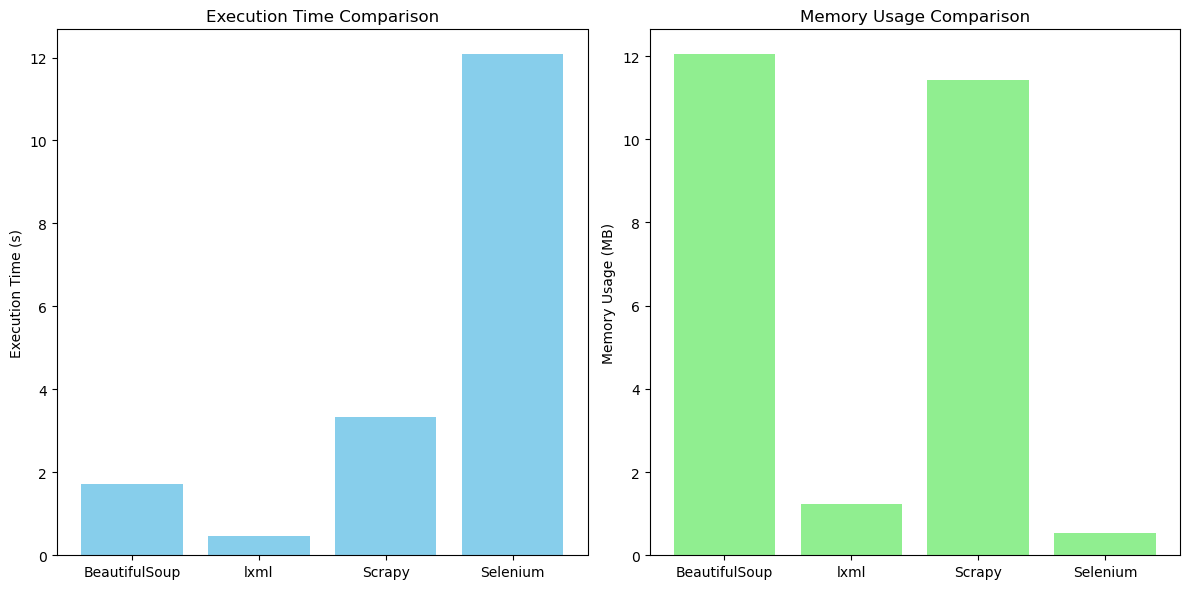

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(methods, execution_times, color='skyblue')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')

plt.subplot(1, 2, 2)
plt.bar(methods, memory_usages, color='lightgreen')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')

plt.tight_layout()
plt.show()

## Conclusions
1. **Execution Time:**

**Selenium** is the slowest, taking the most time to complete the task.

**lxml** is the fastest, followed closely by BeautifulSoup and Scrapy.

2. **Memory Usage:**

**BeautifulSoup** also consumes the most memory and **Scrapy** is slightly more memory-efficient.

**Selenium** and **lxml** are relatively similar in memory usage, being more efficient than the couple from above.

**Overall:**

**lxml** appears to be a best balance between speed and memory efficiency.

**BeautifulSoup** is a viable option for tasks that prioritize speed over memory usage.

**Scrapy** demonstrates a good balance between performance and resource consumption.

**Selenium** should be considered if JavaScript interactions or browser automation are necessary, but it comes at the cost of performance.

**Note!!!** This conclusion is limited by the specific dataset and conditions used for the comparison. In other conditions we can receive another results.

## Resources
1. Web Scraping with Python by Ryan Mitchell
https://edu.anarcho-copy.org/Programming%20Languages/Python/Web%20Scraping%20with%20Python,%202nd%20Edition.pdf
2. Web Scraping 101: Tools, Techniques and Best Practices from Medium
https://medium.com/geekculture/web-scraping-101-tools-techniques-and-best-practices-417e377fbeaf
3. Implementing Web Scraping in Python with BeautifulSoup from GeeksforGeeks
https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
4. Intro to Parsing HTML and XML with Python and lxml from ScrapFly
https://scrapfly.io/blog/intro-to-parsing-html-xml-python-lxml/
5. Run Scrapy code from Jupyter Notebook without issues from TowardsDataSience
https://towardsdatascience.com/run-scrapy-code-from-jupyter-notebook-without-issues-69b7cb79530c
6. Selenium Guide: Run Selenium Using a Jupyter Notebook from ScrapeOps
https://scrapeops.io/selenium-web-scraping-playbook/python-selenium-using-jupyter-notebook/
